In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_csv('Housing Prices.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [5]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [6]:
print(data.shape)

(21613, 21)


In [7]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Null values in dataset
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [8]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [9]:
#hadling the null values
#For Handling null values in Sale price ,No of Bathrooms , Flat area , lot area , area of the house from basement columns 
#here , replaced null values with the mean of their respective column
data['Sale Price'].fillna(data['Sale Price'].mean(), inplace=True)
data['No of Bathrooms'].fillna(data['No of Bathrooms'].mean(), inplace=True)
data['Flat Area (in Sqft)'].fillna(data['Flat Area (in Sqft)'].mean(), inplace=True)
data['Lot Area (in Sqft)'].fillna(data['Lot Area (in Sqft)'].mean(), inplace=True)
data['Area of the House from Basement (in Sqft)'].fillna(data['Area of the House from Basement (in Sqft)'].mean(), inplace=True)
#for Zipcode , null values are placed with mode(Most Frequent)
data['Zipcode'].fillna(data['Zipcode'].mode()[0],inplace=True)

In [10]:
#for null value in Latitude ,Longitude and Living area after Renovation(in Sqft)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  
data[['Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)']] = imputer.fit_transform(data[['Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)']])


In [11]:
#now check null values after the replacement
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

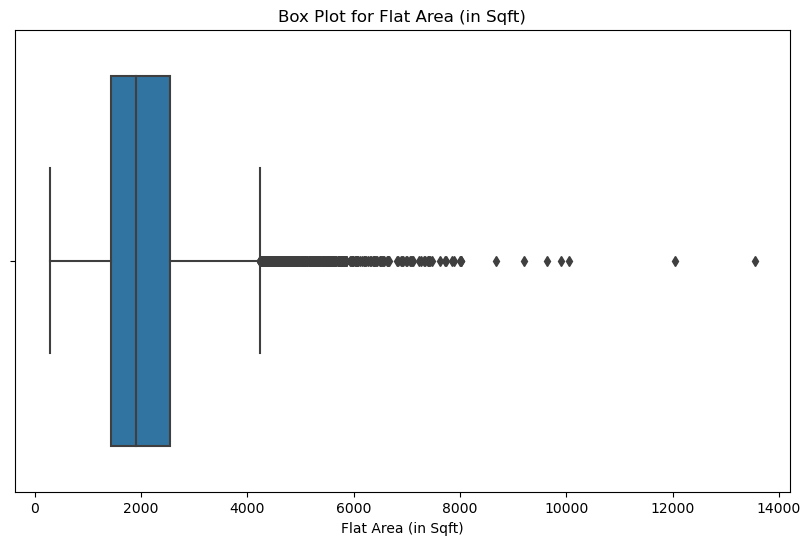

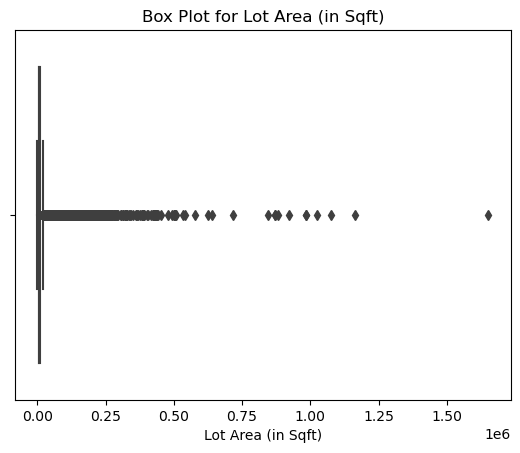

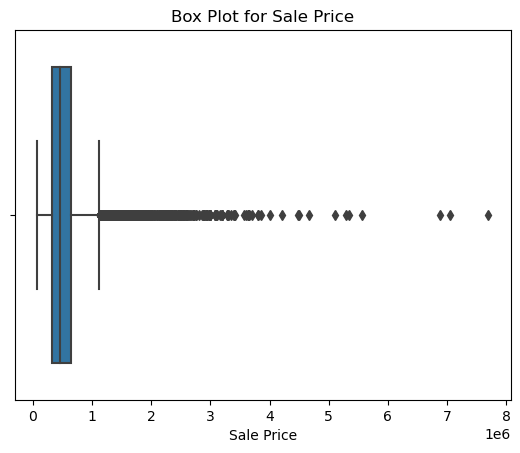

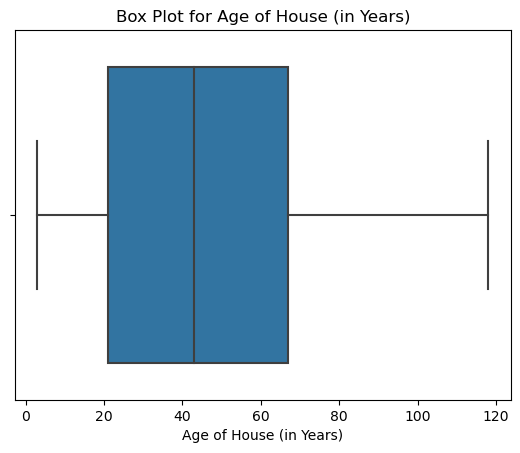

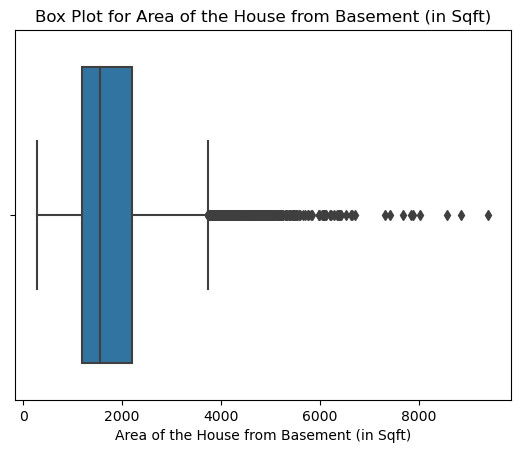

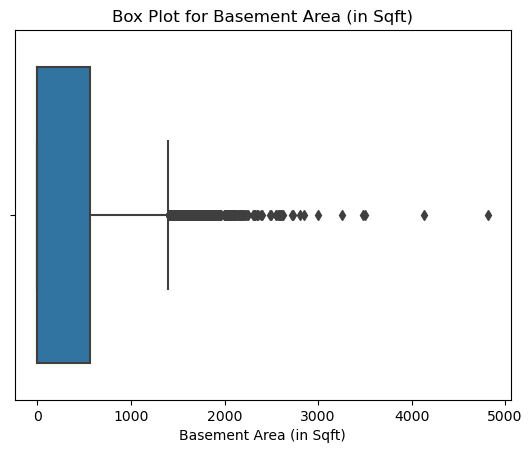

In [12]:
numerical_columns = ['Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Sale Price', 'Age of House (in Years)',
                     'Area of the House from Basement (in Sqft)','Basement Area (in Sqft)'
                    ]

plt.figure(figsize=(10, 6))

for column in numerical_columns:
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()

In [13]:
def replace_outliers_mean(column):
    mean_value = column.mean()
    return column.apply(lambda x: mean_value if (x > mean_value * 3) or (x < mean_value * 0.1) else x)


numerical_columns =  ['Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Sale Price', 'Age of House (in Years)',
                     'Area of the House from Basement (in Sqft)','Basement Area (in Sqft)'
                    ]

for column in numerical_columns:
    data[column] = replace_outliers_mean(data[column])

print(data.head())

           ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520     14 October 2017    221900.0               3   
1  6414100192    14 December 2017    538000.0               3   
2  5631500400    15 February 2016    180000.0               2   
3  2487200875    14 December 2017    604000.0               4   
4  1954400510    15 February 2016    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

  Waterfront View No of Times Visited  ... Overall Grade  \
0              No                None  ...             7   
1              No         

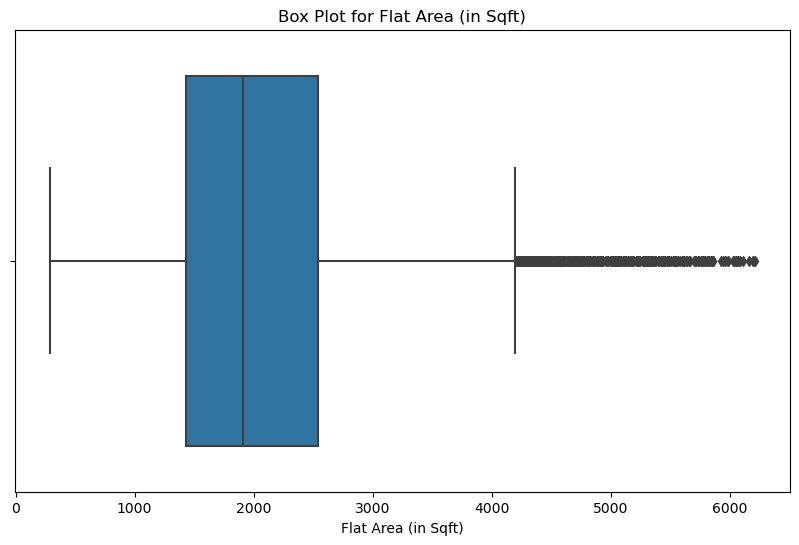

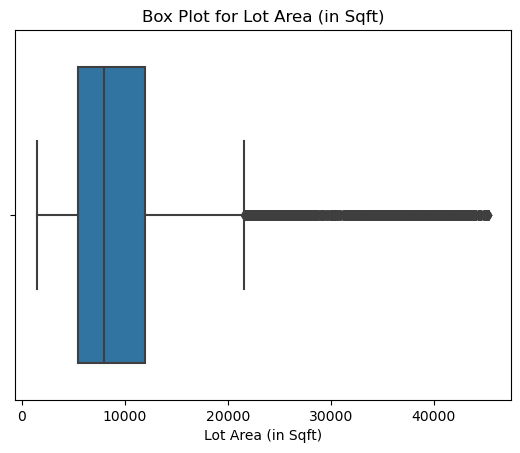

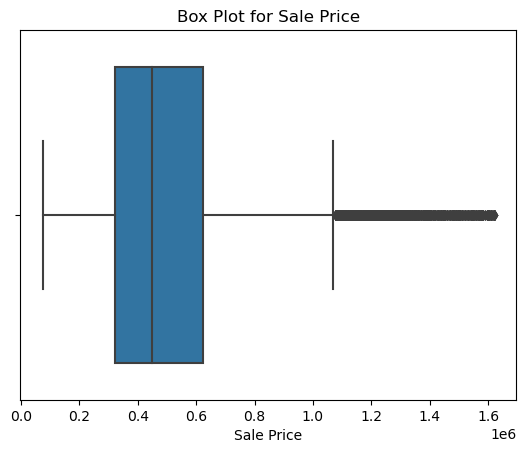

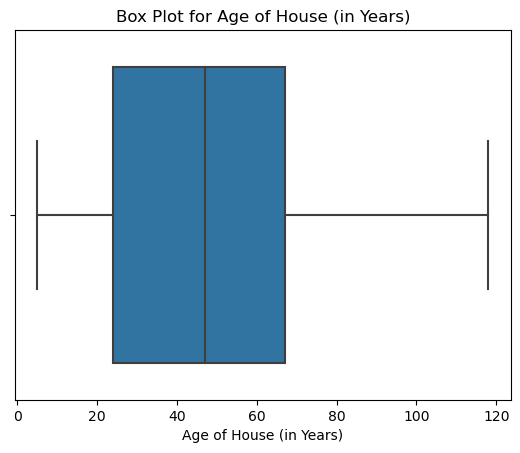

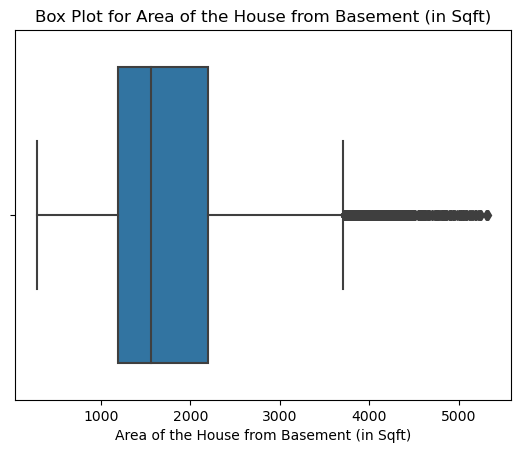

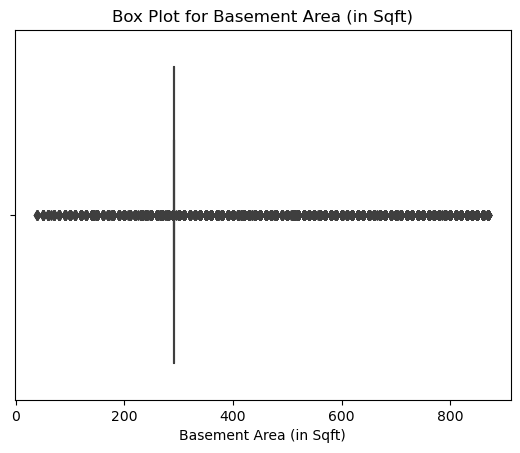

In [14]:
numerical_columns = ['Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Sale Price', 'Age of House (in Years)',
                     'Area of the House from Basement (in Sqft)','Basement Area (in Sqft)'
                    ]

plt.figure(figsize=(10, 6))

for column in numerical_columns:
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()

In [15]:
data1 = pd.get_dummies(data, columns=['No of Times Visited'])
data2 = pd.get_dummies(data1, columns=['Condition of the House'])
data3 = pd.get_dummies(data2, columns=['Waterfront View'])

In [16]:
data3 ['Date House was Sold'] = pd.to_datetime(data3 ['Date House was Sold'])
current_date = pd.to_datetime('today').date()
data3 ['Year Sold'] = data3 ['Date House was Sold'].dt.year
data3 ['Age of House (in Years)'] = current_date.year - data3 ['Year Sold']
data3 .drop(['Date House was Sold', 'Year Sold'], axis=1, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Sale Price                                 21613 non-null  float64
 2   No of Bedrooms                             21613 non-null  int64  
 3   No of Bathrooms                            21613 non-null  float64
 4   Flat Area (in Sqft)                        21613 non-null  float64
 5   Lot Area (in Sqft)                         21613 non-null  float64
 6   No of Floors                               21613 non-null  float64
 7   Overall Grade                              21613 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21613 non-null  float64
 9   Basement Area (in Sqft)                    21613 non-null  float64
 10  Age of House (in Years

In [17]:
correlation_matrix = data3.corr()
print(correlation_matrix['Sale Price'].abs().sort_values(ascending=False))
data3.columns

Sale Price                                   1.000000
Overall Grade                                0.633977
Flat Area (in Sqft)                          0.625961
Living Area after Renovation (in Sqft)       0.567657
Area of the House from Basement (in Sqft)    0.533230
No of Bathrooms                              0.472868
Latitude                                     0.385100
No of Bedrooms                               0.307678
No of Times Visited_None                     0.292818
No of Floors                                 0.275958
No of Times Visited_Thrice                   0.169440
No of Times Visited_Twice                    0.157925
No of Times Visited_Four                     0.150166
Lot Area (in Sqft)                           0.107011
Renovated Year                               0.103630
No of Times Visited_Once                     0.087455
Lot Area after Renovation (in Sqft)          0.087160
Waterfront View_Yes                          0.078822
Waterfront View_No          

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'No of Times Visited_Four',
       'No of Times Visited_None', 'No of Times Visited_Once',
       'No of Times Visited_Thrice', 'No of Times Visited_Twice',
       'Condition of the House_Bad', 'Condition of the House_Excellent',
       'Condition of the House_Fair', 'Condition of the House_Good',
       'Condition of the House_Okay', 'Waterfront View_No',
       'Waterfront View_Yes'],
      dtype='object')

C:\Users\91874\AppData\Local\Temp\ipykernel_23504\3104197806.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


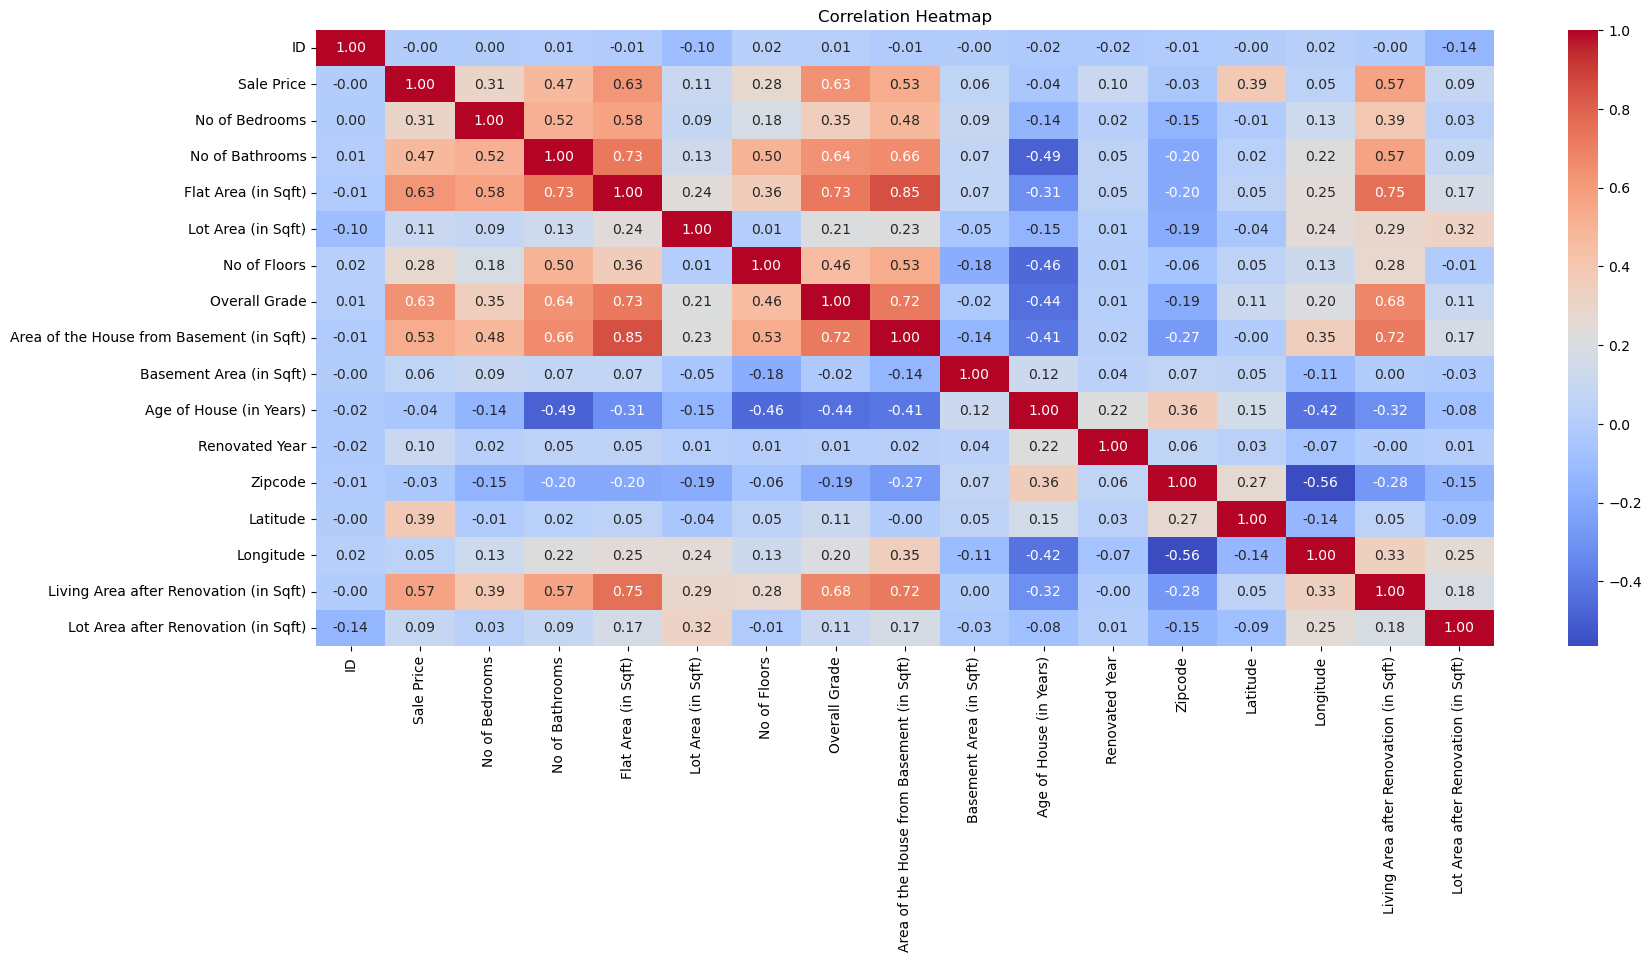

In [18]:
plt.figure(figsize=(19, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
selected_features =['No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'No of Times Visited_Four',
       'No of Times Visited_None', 'No of Times Visited_Once',
       'No of Times Visited_Thrice', 'No of Times Visited_Twice',
       'Condition of the House_Bad', 'Condition of the House_Excellent',
       'Condition of the House_Fair', 'Condition of the House_Good',
       'Condition of the House_Okay', 'Waterfront View_No',
       'Waterfront View_Yes']
X_selected = data3[selected_features]
y = data3['Sale Price']
print("Selected Features:")
print(X_selected.head())
print("\nDependent Variable (Sale Price):")
print(y.head())

Selected Features:
   No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  \
0               3             1.00               1180.0              5650.0   
1               3             2.25               2570.0              7242.0   
2               2             1.00                770.0             10000.0   
3               4             3.00               1960.0              5000.0   
4               3             2.00               1680.0              8080.0   

   No of Floors  Overall Grade  Area of the House from Basement (in Sqft)  \
0           1.0              7                                     1180.0   
1           2.0              7                                     2170.0   
2           1.0              6                                      770.0   
3           1.0              7                                     1050.0   
4           1.0              8                                     1680.0   

   Basement Area (in Sqft)  Age of House (i

In [20]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()
# Scale the selected features
X_scaled = scaler.fit_transform(X_selected)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
lr = LinearRegression()

In [23]:
# Train the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions on the test data
predictions = lr.predict(X_test)

In [25]:
lr.score(X_test,y_test)

0.6002901541548469

In [26]:
# for better result , we are using RandomForestRegressor
from sklearn.ensemble  import RandomForestRegressor

In [27]:
Rf=RandomForestRegressor()

In [28]:
Rf.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
Rf.score(X_test,y_test)

0.790039685656674

In [31]:
#above result shows that , Random Forest Regressor is more efficient than Regression here